# Contexte
Ceci a été réalisé dans le cadre d'un projet de master, avec pour objectif le nettoyage, l'exploration et la visualisation des données, ainsi que la mise au point d'un modèle permettant la classification.

# Information sur le DataSet

Season in which the analysis was performed. 	1) winter, 2) spring, 3) Summer, 4) fall. 	(-1, -0.33, 0.33, 1)

Age at the time of analysis. 	18-36 	(0, 1)

Childish diseases (ie , chicken pox, measles, mumps, polio)	1) yes, 2) no. 	(0, 1)

Accident or serious trauma 	1) yes, 2) no. 	(0, 1)

Surgical intervention 	1) yes, 2) no. 	(0, 1)

High fevers in the last year 	1) less than three months ago, 2) more than three months ago, 3) no. 	(-1, 0, 1)

Frequency of alcohol consumption 	1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never 	(0, 1)

Smoking habit 	1) never, 2) occasional 3) daily. 	(-1, 0, 1)

Number of hours spent sitting per day 	ene-16	(0, 1)

Output: Diagnosis	normal (N), altered (O)




# Import des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random # for data alteration
import matplotlib.pyplot as plt
import seaborn as sns # for heat map
import math
import numpy as np

# Initialisation des variables globales.

In [2]:
SEED = 5

invalid_values = ["NaN", "", "X", pd.NA] # list des variables invalides qui seront inséré aléatoirement dans notre dataframe

# Le dataframe ne disposant pas de noms de colonnes, la nomenclature se fera grâce à cette liste
columns = ["Analysis_Season","Age","Childish_Diseases","Accident","Surigical_Intervention","Fever_Last_Year","Freq_Alcohol_Consumption","Smoking","Sitting_Hours","Diagnosis"]

dict_val_saeson = {-1:"winter",-0.33:"spring",0.33:"summer",1:"autumn"} # Pour la conversion des saisons

# Import du dataframe via Github

In [3]:
df_init = pd.read_csv("/kaggle/input/fertility/Fertility.txt", sep=",", names = columns)

# Description globale du dataframe

In [4]:
df_init.head()

,Analysis_Season,Age,Childish_Diseases,Accident,Surigical_Intervention,Fever_Last_Year,Freq_Alcohol_Consumption,Smoking,Sitting_Hours,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [5]:
df_init.shape

(100, 10)

In [6]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Analysis_Season           100 non-null    float64
 1   Age                       100 non-null    float64
 2   Childish_Diseases         100 non-null    int64  
 3   Accident                  100 non-null    int64  
 4   Surigical_Intervention    100 non-null    int64  
 5   Fever_Last_Year           100 non-null    int64  
 6   Freq_Alcohol_Consumption  100 non-null    float64
 7   Smoking                   100 non-null    int64  
 8   Sitting_Hours             100 non-null    float64
 9   Diagnosis                 100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [7]:
df_init.describe()

,Analysis_Season,Age,Childish_Diseases,Accident,Surigical_Intervention,Fever_Last_Year,Freq_Alcohol_Consumption,Smoking,Sitting_Hours
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_init.isnull().sum()

Analysis_Season             0
Age                         0
Childish_Diseases           0
Accident                    0
Surigical_Intervention      0
Fever_Last_Year             0
Freq_Alcohol_Consumption    0
Smoking                     0
Sitting_Hours               0
Diagnosis                   0
dtype: int64

# Alteration et nettoyage des données


In [9]:
df = df_init.copy()  # On crée un deuxième dataframe sur lequel nous allons effectuer nos changements.

### insertion aleatoire des variables non valides

In [10]:
tmp_row = df.sample( n = 12 , random_state=SEED) # On prend 12 rangées aléatoirement
new_indexs = {} # Dictionnaire qui va contenir les nouveaux index des rangées non valides
for i in range(12) : # On modifie une valeur invalide sur l'une des colonnes de manière aléatoire.
  tmp_row.iloc[i,random.randint(0,df.shape[1]-1)] = random.choice( invalid_values)
  new_indexs[tmp_row.index[i]] = tmp_row.index[i] + 0.1 # On ajoute 0.1 pour que les rangées s'insèrent à des endroits différents
  tmp_row.rename(index = new_indexs, inplace=True)
df = pd.concat([df,tmp_row]) # On rajoute le dataframe avec les valeurs invalides sur le dataframe initiale
df.sort_index(inplace=True)
df.reset_index(drop=True,inplace=True)

## verification de la modification

In [11]:
df.shape

(112, 10)

In [12]:
df.isnull().sum()

Analysis_Season             1
Age                         1
Childish_Diseases           0
Accident                    0
Surigical_Intervention      0
Fever_Last_Year             0
Freq_Alcohol_Consumption    0
Smoking                     1
Sitting_Hours               0
Diagnosis                   0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Analysis_Season           111 non-null    float64
 1   Age                       111 non-null    object 
 2   Childish_Diseases         112 non-null    object 
 3   Accident                  112 non-null    object 
 4   Surigical_Intervention    112 non-null    object 
 5   Fever_Last_Year           112 non-null    object 
 6   Freq_Alcohol_Consumption  112 non-null    float64
 7   Smoking                   111 non-null    object 
 8   Sitting_Hours             112 non-null    float64
 9   Diagnosis                 112 non-null    object 
dtypes: float64(3), object(7)
memory usage: 8.9+ KB


À l'issue de cette modification, on constate que l'on a bien 12 rangées supplémentaires qui contiennent des valeurs invalides et des valeurs nulles

In [14]:
df_invalid = pd.DataFrame() #on initialise un dataFrame qui va contenir toutes nos valeurs invalides et nulles
# on boucle sur toutes les colonnes et on verifit si elles contiennent une valeur invalide ou nulle
for col in df.columns.to_list() :
  df_invalid = pd.concat([df[  (df[col].isin(invalid_values)) | (df[col].isnull()) ],df_invalid])
df_invalid   # On affiche le dataframe



,Analysis_Season,Age,Childish_Diseases,Accident,Surigical_Intervention,Fever_Last_Year,Freq_Alcohol_Consumption,Smoking,Sitting_Hours,Diagnosis
27,1.00,0.69,1,0,1,-1,1.0,,0.44,O
42,-1.00,0.78,1,1,0,1,0.6,<NA>,0.38,N
11,1.00,0.67,1,1,0,X,0.8,0,0.31,N
38,1.00,0.64,0,0,0,NaN,1.0,-1,0.63,N
55,-0.33,0.56,1,0,,0,1.0,-1,0.63,N
85,-1.00,0.53,1,,0,1,0.8,-1,0.63,N
109,-1.00,0.67,,1,1,0,1.0,-1,0.31,N
19,1.00,X,1,0,1,0,0.8,-1,0.25,O
23,1.00,NaN,0,0,1,0,0.8,-1,0.25,N
33,1.00,,0,0,1,0,1.0,-1,0.19,N


## Supression des rangées qui contiennent les variables invalides

In [15]:
df.drop(df_invalid.index.to_list(), inplace=True) # On supprime les memes indexes que celle du dataframe avec les rangées invalides

## Verification de la suppression

On remarque que suite à la suppression, l'indexation ne s'est pas arrangée, on doit la corriger

In [16]:
df.reset_index(drop=True,inplace=True)

In [17]:
df

,Analysis_Season,Age,Childish_Diseases,Accident,Surigical_Intervention,Fever_Last_Year,Freq_Alcohol_Consumption,Smoking,Sitting_Hours,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.5,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [18]:
df.compare(df_init) # Renvoit les colonnes qui sont differentes des deux dataframe sous forme d'un dataframe

Empty DataFrame
Columns: []
Index: []

La fonction *compare()* retourne un tableau vide et permet de démontrer qu'à la suite du nettoyage des données, on se retrouve avec le même jeu de données initial.

# Exploration des données

## Formattage des données

On repart quand même avec le dataframe initial pour s'assurer de repartir avec les mêmes données

In [19]:
df = df_init.copy()

On change les valeurs du diagnostic en valeurs binaires

In [20]:
df.Diagnosis.replace({"N":1,"O":0},inplace=True)

On change les valeurs des saisons en variables catégorielles.

In [21]:
df.Analysis_Season = df.Analysis_Season.map(dict_val_saeson)
df.sample(5)

,Analysis_Season,Age,Childish_Diseases,Accident,Surigical_Intervention,Fever_Last_Year,Freq_Alcohol_Consumption,Smoking,Sitting_Hours,Diagnosis
95,winter,0.67,1,0,0,0,1.0,-1,0.50,1
59,autumn,0.58,0,0,0,1,0.8,1,0.44,1
81,winter,0.81,1,1,1,1,0.8,0,0.19,1
30,autumn,0.61,1,0,1,0,1.0,-1,0.63,1
31,autumn,0.56,1,0,0,0,1.0,-1,0.44,1


La variable des saisons parait ne pas etre pertinante concernant sont impacte sur la Fertilité, on verifit si sa supression est preferable ou non, et ceci en verifiant si les proportions sont les meme pour la population globale, et la population non fertile

Text(0.5, 1.0, 'Distriution des saisons\npour la population non fertile')

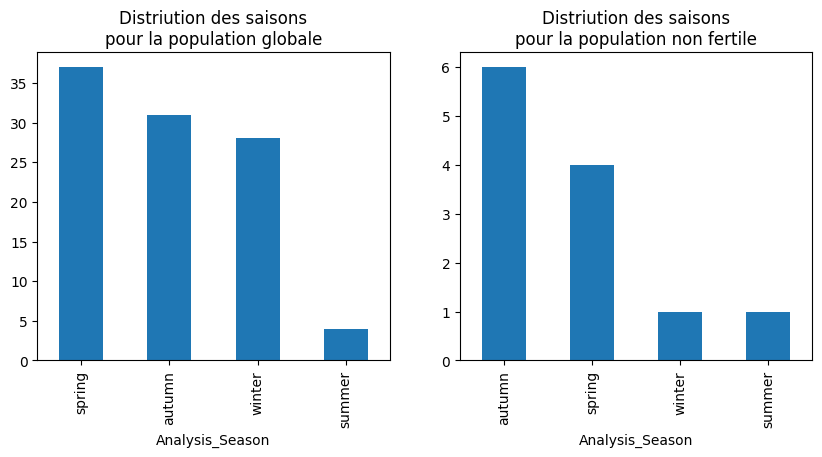

In [22]:
fig, axs = plt.subplots(1,2,figsize=(10,4))
df['Analysis_Season'].value_counts().plot.bar(ax=axs[0]).set_title('Distriution des saisons\npour la population globale')
df_non_fertil = df[df['Diagnosis'] == 0]
df_non_fertil['Analysis_Season'].value_counts().plot.bar(ax=axs[1]).set_title('Distriution des saisons\npour la population non fertile')

Il y a un changement des saisons pour la population globale et le groupe non fertile, et donc le changement de saison peut avoir un impact sur la fertilité. Cette variable sera donc gardée et transformée par one-hot encoding.

In [23]:
df = pd.get_dummies(df,prefix="",prefix_sep="", columns = ['Analysis_Season'])
df.sample(5)

,Age,Childish_Diseases,Accident,Surigical_Intervention,Fever_Last_Year,Freq_Alcohol_Consumption,Smoking,Sitting_Hours,Diagnosis,autumn,spring,summer,winter
53,0.58,1,1,1,-1,0.8,0,0.19,1,False,True,False,False
43,0.56,1,0,0,0,1.0,-1,0.44,1,False,False,False,True
66,0.50,1,1,0,-1,0.8,0,0.88,1,False,True,False,False
57,0.69,1,1,1,-1,1.0,-1,0.75,1,False,True,False,False
17,0.69,1,0,1,0,0.8,-1,0.25,0,True,False,False,False


Afin de standardiser nos données et d'avoir des valeurs comprises entre 0 et 1, on modifie la variable 'smoking' (-1, 0, 1) en (0, 0.5, 1) afin de ne pas avoir une valeur négative. De plus, la valeur négative introduit un biais dans l'interprétation des résultats.

In [24]:
# !!! execute once
df.Smoking = df.Smoking.map(lambda x : (x + 1)/2 )

Meme chose avec la variable fievre

In [25]:
# !!! execute once
df.Fever_Last_Year = df.Fever_Last_Year.map(lambda x : (x + 1)/2 )

À ce stade, toutes nos variables varient entre 0 et 1. Il n'est plus nécessaire de faire du scaling. Grâce à ce traitement de données, il ne reste plus qu'à distinguer les variables catégorielles des variables numériques.

Pour cela, on crée deux listes : l'une contient les colonnes à 2 ou 3 valeurs possibles, et l'autre contient les colonnes à plusieurs valeurs.

In [26]:
columnsFloat = ["Age" , "Freq_Alcohol_Consumption","Sitting_Hours"]
columnsInt = list(set(df.columns.to_list())- set(columnsFloat))

## Visualisation des données pertinantes

Proportion des diagnostiques fertil et non fertil

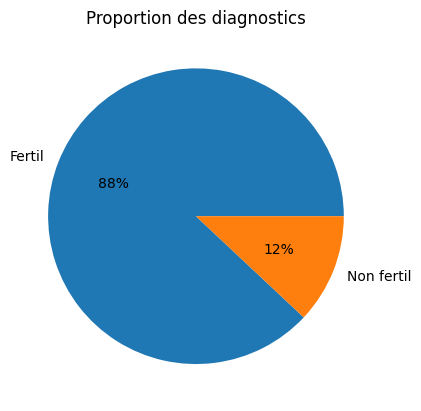

In [27]:
proportion = df.Diagnosis.value_counts() / df.Diagnosis.count()
label = ['Fertil', 'Non fertil']
plt.pie(proportion,labels = label,autopct='%.0f%%')
plt.title('Proportion des diagnostics')
plt.show()

Puis on virifit la proportion des differentes colonnes

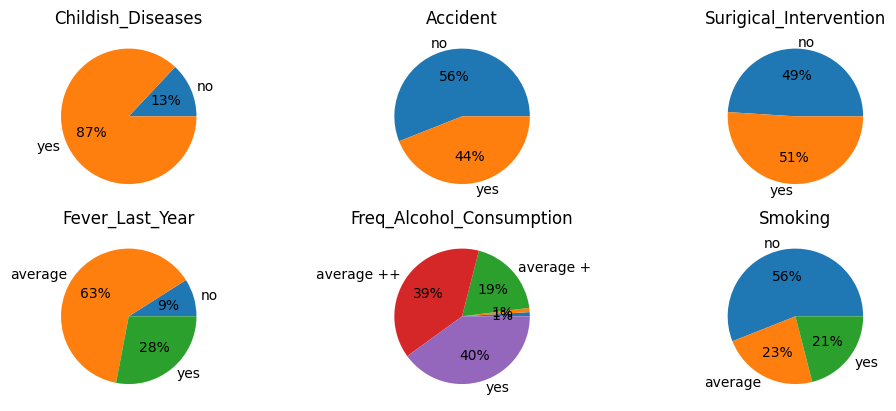

In [28]:
fig_pies , pie_axes = plt.subplots(2,3,figsize=(10,4),layout="constrained") # On prepare notre figure
i = 1
for ax1 in pie_axes :
  for ax2 in ax1 :
    proportion = df[df.columns[i]].value_counts()/df.shape[0]

    # On formatte et on classe les lables pour qu'elle correspondent aux proportions obtenus
    uniques = df[df.columns[i]].unique()
    uniques.sort()
    labels = []
    for label in  uniques :
      if label == 0  : labels.append("no")
      elif label == 1  : labels.append("yes")
      elif label == 0.5 : labels.append("average")
      elif label == 0.2 : labels.append("")
      elif label == 0.4 : labels.append("")
      elif label == 0.6 : labels.append("average +")
      elif label == 0.8 : labels.append("average ++")
      else : labels.append(label)

    # On dessine
    ax2.pie(proportion.sort_index(),labels=labels,autopct="%.0f%%")
    ax2.set_title(df.columns[i])

    i += 1


On calcule les âges de la population totale, des individus fertiles et des individus non fertiles

In [29]:
# ces variables fairont office de titre pour nos figures
title_age_G = "Distribution age global\nAge moyen : " + str(round(df.Age.mean()*36))
title_age_F = "Distribution age fertil\nAge moyen : " + str(round(df[df['Diagnosis'] == 1].Age.mean()*36))
title_age_NF = "Distribution age non fertil\nAge moyen : " + str(round(df[df['Diagnosis'] == 0].Age.mean()*36))

On plot la distribution de l'age avec l'age moyen

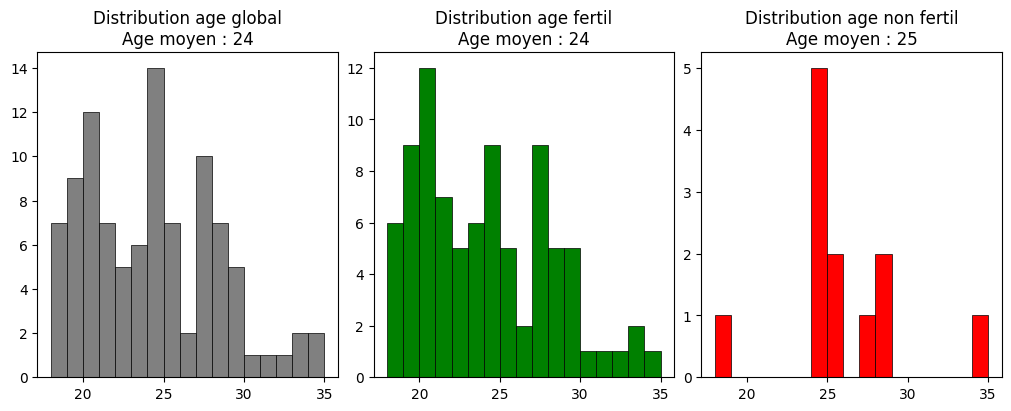

In [30]:
fig , axes = plt.subplots(1,3, figsize=(10,4), layout="constrained")

# On multiplit par 36 l'age (d'apres information du dataset)
axes[0].hist(round(df.Age * 36).astype("int32"),bins=range(18,36),linewidth=0.5, edgecolor="black", range=(18,35), color = "gray" )
axes[0].set_title(title_age_G)
axes[1].hist(round(df[df['Diagnosis'] == 1].Age * 36).astype("int32"),bins=range(18,36),linewidth=0.5, edgecolor="black", range=(18,35), color = "green" )
axes[1].set_title(title_age_F)
axes[2].hist(round(df[df['Diagnosis'] == 0].Age * 36).astype("int32"),bins=range(18,36),linewidth=0.5, edgecolor="black", range=(18,35), color = "red" )
axes[2].set_title(title_age_NF)
fig.show()

On constate que l'âge moyen est relativement similaire dans l'ensemble.

On va ploter un scatter plot des heures assises en fonction des ages

Text(0.5, 1.0, 'Proportions des heures assises')

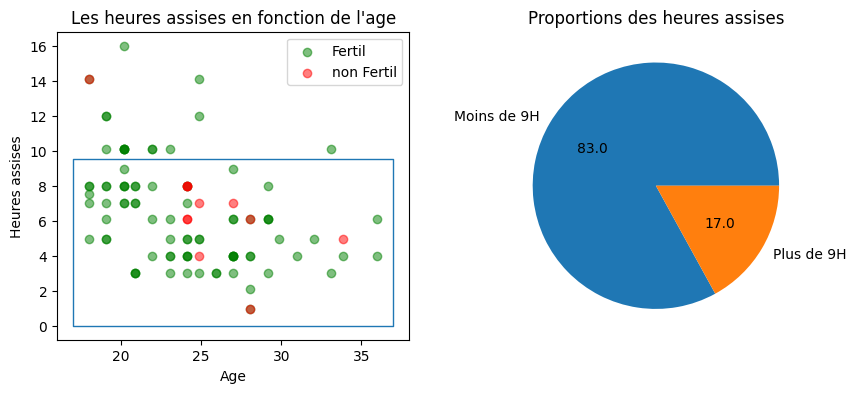

In [31]:
proportion_less_9 = df[df['Sitting_Hours'] < 9/16].shape[0]/df.shape[0]
fig , axes = plt.subplots(1,2,figsize=(10,4))
axes[0].scatter(df[df["Diagnosis"] == 1 ].Age * 36, df[df["Diagnosis"] == 1 ].Sitting_Hours * 16 ,c="green",alpha=0.5)
axes[0].scatter(df[df["Diagnosis"] == 0 ].Age * 36, df[df["Diagnosis"] == 0 ].Sitting_Hours * 16 ,c="red",alpha=0.5)
axes[0].legend(["Fertil","non Fertil"])
axes[0].set_title("Les heures assises en fonction de l'age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Heures assises")
axes[0].fill_between(np.arange(17,38),9.5,facecolor="none",edgecolor="tab:blue")
axes[1].pie([proportion_less_9,1-proportion_less_9],labels = ["Moins de 9H","Plus de 9H"],autopct='%1.1f')
axes[1].set_title("Proportions des heures assises")


On observe que la majorité de notre population non fertile se trouve en dessous de 9 heures d'assise, ce qui semble logique puisque la plupart de notre population s'assoit moins de 9 heures par jour.



---



On vérifie grâce à la somme des colonnes à 2 ou 3 valeurs quelles sont les variables les plus impliquées dans la non-fertilité, et on stocke ces sommes dans une variable.

In [32]:
non_fertil_var = df[df['Diagnosis']==0].loc[:,columnsInt].sum().sort_values(ascending=False)

In [33]:
non_fertil_var

Childish_Diseases         10.0
Surigical_Intervention     7.0
Fever_Last_Year            6.0
autumn                     6.0
Smoking                    4.5
spring                     4.0
Accident                   3.0
summer                     1.0
winter                     1.0
Diagnosis                  0.0
dtype: float64

On plot le resultat

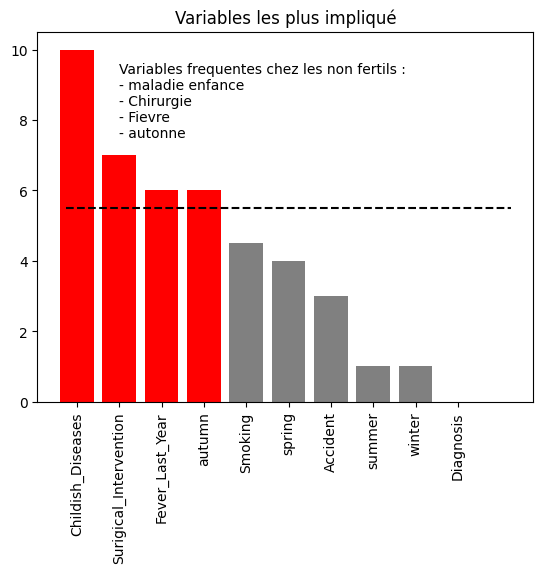

In [34]:
plt.bar(x=non_fertil_var.index.to_list(),height=non_fertil_var.to_list(),
        color= ["red","red","red","red","gray","gray","gray","gray","gray"])
plt.xticks(rotation='vertical')
plt.title("Variables les plus impliqué")
plt.hlines(5.5,-0.25,10.25,color="black",linestyle="dashed")
plt.annotate("Variables frequentes chez les non fertils :\n- maladie enfance\n- Chirurgie\n- Fievre\n- autonne",
             (1,7.5))
plt.show()

On vérifie la fréquence de ces 4 caractéristiques dans la population globale et on la compare avec la population non fertile.

Text(0.73, 0.42, 'Le seul\nparametre\nvariable')

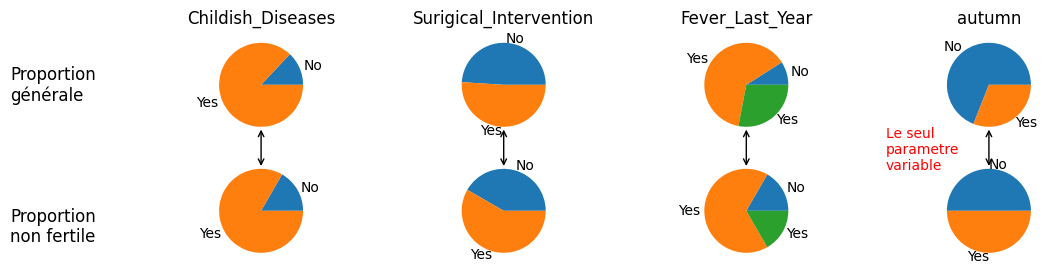

In [35]:
top_var_no_fertil = ["Childish_Diseases", 'Surigical_Intervention','Fever_Last_Year','autumn']
fig , axes = plt.subplots(2,4,figsize=(12,3))
for i,col in enumerate(top_var_no_fertil) :
  proportion1 = df[col].value_counts()/df.shape[0]
  labels = ["No","Yes","Yes"] if col == "Fever_Last_Year" else ["No", "Yes"]
  proportion2 = df[df["Diagnosis"]==0][col].value_counts()/df_non_fertil.shape[0]
  axes[0,i].pie(proportion1.sort_index(),labels=labels)
  axes[0,i].set_title(col)
  axes[0,i].annotate("", xy=(0,-1), xytext=(0,-2), arrowprops=dict(arrowstyle='<->'))
  axes[1,i].pie(proportion2.sort_index(),labels=labels)
plt.figtext(0,0.65,"Proportion\ngénérale",fontsize=12,)
plt.figtext(0,0.18,"Proportion\nnon fertile",fontsize=12)
plt.figtext(0.73,0.42,"Le seul\nparametre\nvariable",fontsize=10, c="red")

On remarque qu'à part l'automne, toutes les variables les plus fréquentes chez les non fertiles sont pratiquement les mêmes que pour la population globale. On conclut donc qu'il n'y a vraisemblablement pas de variable qui puisse impacter la fertilité plus que les autres.

Il y a certes anormalement plus de non fertiles en automne ; cela pourrait s'expliquer par un biais expérimental qui se serait produit lors de la sélection des individus testés


---


On part ensuite sur l'hypothèse que la somme de toutes ces caractéristiques pourrait expliquer l'altération de la fertilité. On vérifie cela en faisant la somme des caractéristiques de notre dataframe horizontalement.

In [36]:
factor_score = df[columnsInt].sum(axis=1)

On plot le resultat

Text(0.5, 1.0, 'Facteur de risques cumulés')

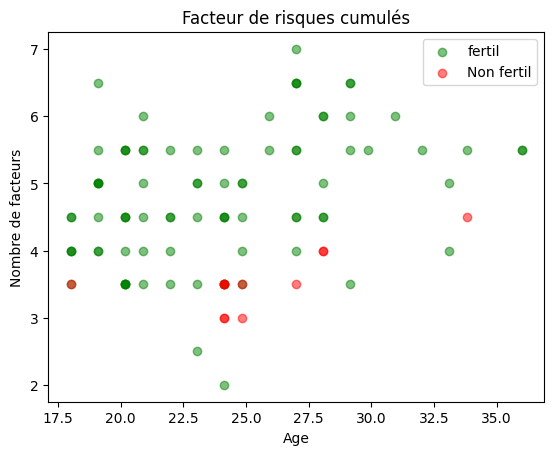

In [37]:
plt.scatter(df[df["Diagnosis"]==1]["Age"]*36,
            df[df["Diagnosis"]==1][columnsInt].sum(axis=1),
            c="green",alpha=0.5,label="fertil")
plt.scatter(df[df["Diagnosis"]==0]["Age"]*36,
            df[df["Diagnosis"]==0][columnsInt].sum(axis=1),
            c="red",alpha=0.5,label="Non fertil")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Nombre de facteurs")
plt.title("Facteur de risques cumulés")

Il est surprenant de voir que toute la population non fertile n'a pas forcément plus de facteurs de risques cumulés que la population fertile, bien au contraire.

On vérifie la distribution de ce score de facteur cumulé.

Text(0, 0.5, 'effectif')

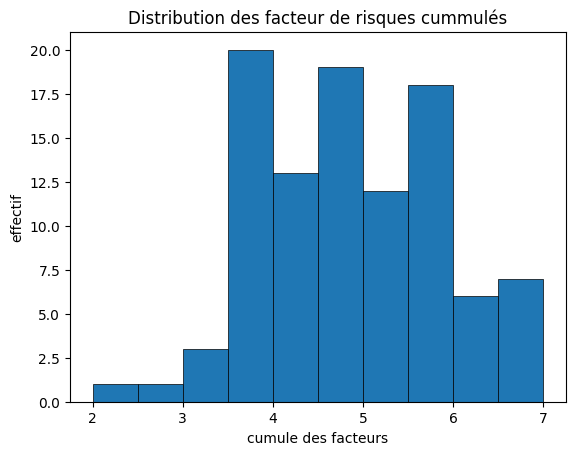

In [38]:
plt.hist(factor_score,linewidth=0.5, edgecolor="black")
plt.title("Distribution des facteur de risques cummulés")
plt.xlabel("cumule des facteurs")
plt.ylabel("effectif")

On vérifie la corrélation avec la corrélation de Matthews, qui est plus adaptée pour déterminer la corrélation entre deux variables binaires.

Text(0, 0.5, 'Correlation')

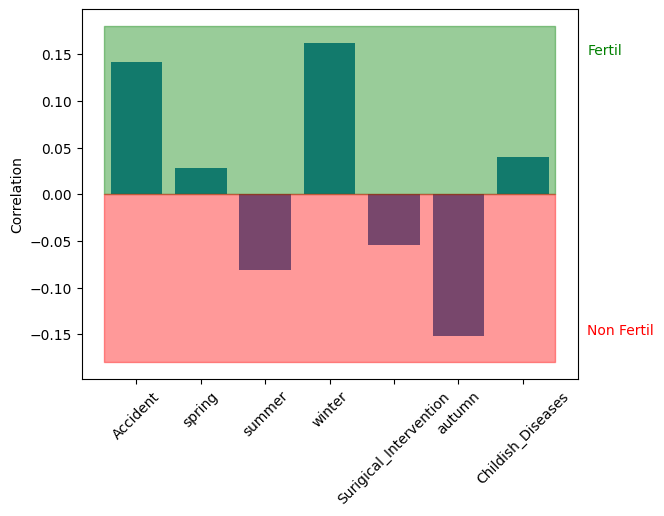

In [39]:
from sklearn.metrics import matthews_corrcoef
correlations = {}
for col in columnsInt :
  if col != "Diagnosis" and  col !="Smoking" and col != "Fever_Last_Year" :
    correlations[col] = matthews_corrcoef(df['Diagnosis'], df[col])
correlations
plt.bar(correlations.keys(),correlations.values())
plt.xticks(rotation=45)
plt.text(7,0.15,"Fertil",c="green")
plt.text(7,-0.15,"Non Fertil",c="red")
plt.fill_between(np.arange(-0.5,7.5),0.18,color="green",alpha=0.4)
plt.fill_between(np.arange(-0.5,7.5),-0.18,color="red",alpha=0.4)
plt.ylabel("Correlation")

Ces résultats confirment nos observations faites précédemment, et on constate que la saison de l'automne ressort.

<Axes: >

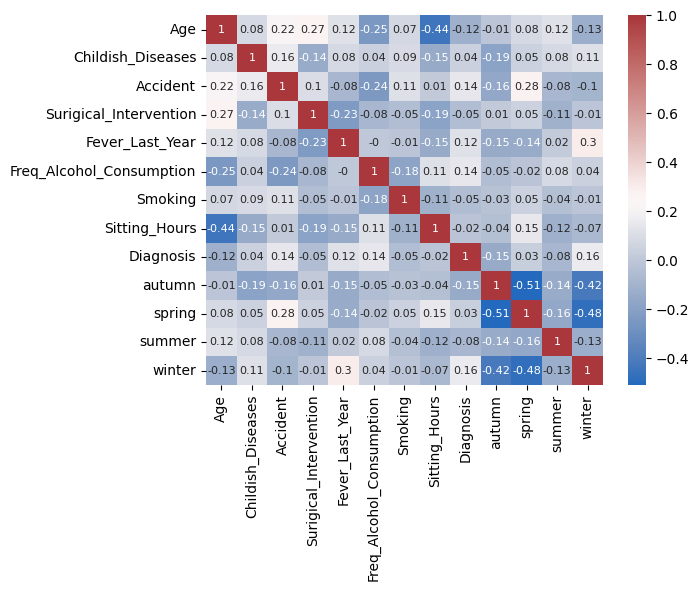

In [40]:
sns.heatmap(round(df.corr(),2), annot=True, annot_kws={"fontsize":8},cmap=sns.color_palette("vlag", as_cmap=True))

Il n'y a pas de fortes corrélations qui se dégagent, on remarque juste une corrélation négative moyenne entre les heures assises et l'âge.

# Classificateur model

## séparation des données

In [41]:
df_train = df.copy()

Import des librairies ScikitLearn

In [42]:
# Models
from sklearn.tree import DecisionTreeClassifier as DT

# Matrice de confusion
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import ConfusionMatrixDisplay as CMD

# Evaluation des scores
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay as plt_roc_curve

from sklearn import tree # Pour ploter l'arbre decisionel

In [43]:
#On prend 4 individus sterils auquel on rajoute 16 individus sterils pour former notre dataframe d'entrainement
df_test = pd.concat( [df[df["Diagnosis"]==0].sample(4,random_state=SEED)  ,df[df["Diagnosis"]==1].sample(16,random_state=SEED)])

#On supprime les les individus qu'on a pris aleatoirement du premier Dataframe
df_train.drop(df_test.index.tolist(),axis=0, inplace=True)

#On melange l'ordre des dataframes
df_train = df_train.sample(frac=1,random_state=SEED)
df_test = df_test.sample(frac=1,random_state=SEED)

#On separe nos output des dataframe
x_train, y_train = df_train.drop('Diagnosis', axis=1), df_train['Diagnosis']
x_test, y_test = df_test.drop('Diagnosis', axis=1), df_test['Diagnosis']

## On verifie notre séparation des données

In [44]:
print('X_train', x_train.shape)
print('y_train', y_train.shape)
print('X_test', x_test.shape)
print('y_test', y_test.shape)
print(f"\nProportion des fertilités pour les données d'entrainement :\n{y_train.value_counts()}")
print(f"\nProportion des fertilités pour les données de test :\n{y_test.value_counts()}")

X_train (80, 12)
y_train (80,)
X_test (20, 12)
y_test (20,)

Proportion des fertilités pour les données d'entrainement :
Diagnosis
1    72
0     8
Name: count, dtype: int64

Proportion des fertilités pour les données de test :
Diagnosis
1    16
0     4
Name: count, dtype: int64


## Arbre décisionnel

### Entrainement et test

In [45]:
clf_dt = DT(random_state=SEED)  # on instancit notre model
clf_dt.fit(x_train,y_train) # on entraine
y_train_predict = clf_dt.predict(x_train) # on predit  sur les données d'entrainement
y_test_predict = clf_dt.predict(x_test) # on predit sur les données de test

Evaluation du model

Text(0.5, 1.0, 'Resultat test')

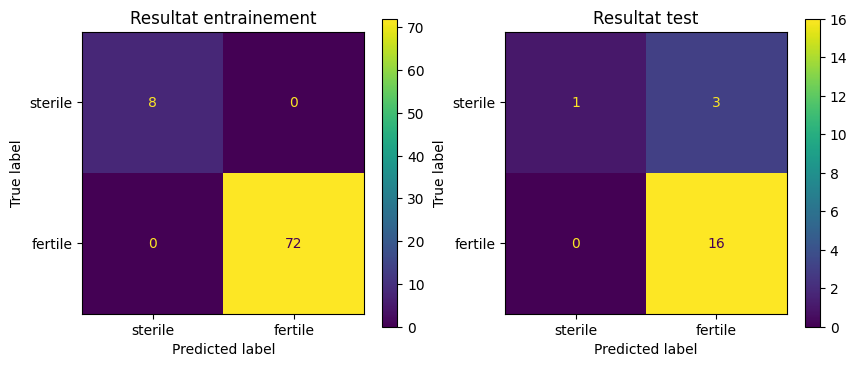

In [46]:
fig, axes = plt.subplots(1,2,figsize=(10,4)) # On initialise notre figure

# On plot la matrice de confusion de l'entrainement
cf_matrix = CM(y_train, y_train_predict )
cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["sterile","fertile"])
cm_plt.plot(ax=axes[0])
axes[0].set_title("Resultat entrainement")

# On plot la matrice de confusion du test
cf_matrix = CM(y_test, y_test_predict)
cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["sterile","fertile"])
cm_plt.plot(ax=axes[1])
axes[1].set_title("Resultat test")



Le modèle est très mauvais dans la prédiction des non fertiles au test. Il faut augmenter le nombre des non fertiles.

In [47]:
print("f1 score entrainement : ",f1_score(y_train, y_train_predict, average='weighted'))
print("f1 score test : ",f1_score(y_test, y_test_predict, average='weighted'))
print("recall_score entrainement : ",recall_score(y_train, y_train_predict, average='weighted'))
print("recall_score test : ",recall_score(y_test, y_test_predict, average='weighted'))
print("precision entrainement : ",precision_score(y_train, y_train_predict, average='weighted'))
print("precision test : ",precision_score(y_test, y_test_predict, average='weighted'))
print("justesse entrainement : ",accuracy_score(y_train, y_train_predict))
print("justesse test : ",accuracy_score(y_test, y_test_predict))

f1 score entrainement :  1.0
f1 score test :  0.8114285714285714
recall_score entrainement :  1.0
recall_score test :  0.85
precision entrainement :  1.0
precision test :  0.8736842105263157
justesse entrainement :  1.0
justesse test :  0.85


Le modèle est meilleur avec les données d'entraînement, il serait donc en situation de surapprentissage (overfitting)

On plot l'arbre decisionnel

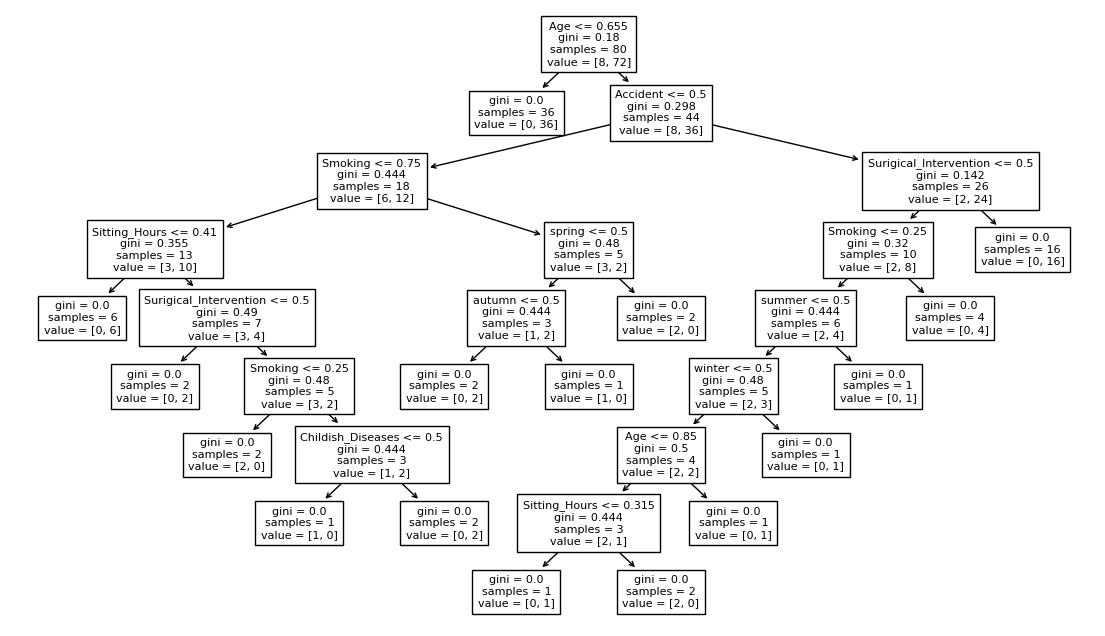

In [48]:
fig , ax = plt.subplots(figsize=(14,8))
tree.plot_tree(clf_dt,ax=ax,fontsize=8,feature_names=x_train.columns)
plt.show()

Étant donné que le modèle a un score de 100% pour le jeu d'entraînement et un score insuffisant en test, on va réduire la complexité du modèle pour lui permettre de généraliser. Avec l'arbre décisionnel, la meilleure manière de le faire est de diminuer la profondeur de l'arbre et d'augmenter le nombre d'exemples minimum pour créer une feuille.

## Optimisation du model

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

On essaie toutes les profondeurs inférieures à 7, comme celle du modèle précédent, et on essaie de faire varier un nombre plus important d'exemples minimaux pour créer une feuille, et on prend en concideration l'amelioration du score de precision.

In [50]:
import warnings
warnings.filterwarnings("ignore") #on ignore le warning des fit qui n'aboutisseent pas

param = {
    "max_depth" : list(np.arange(1,7)), # profondeur maximal
    "min_samples_leaf" : list(np.arange(1,4)), # min d'exemple pour creer une feuille
    "min_samples_split" : list(np.arange(1,4)),
    "criterion" : ["gini", "entropy", "log_loss"] # methode pour evaluer le cout
}
clf_dt2 = DT()
clf_dt2 = GridSearchCV(clf_dt2 , param, scoring="precision")
clf_dt2.fit(x_train, y_train)
print(f"Les meilleurs parametres choisis :\n{clf_dt2.best_params_} avec un score de precision de {clf_dt2.best_score_}")



Les meilleurs parametres choisis :
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3} avec un score de precision de 0.9193181818181818


In [51]:
warnings.filterwarnings("default")

In [52]:
y_train_predict = clf_dt2.predict(x_train) # on predit le sur les données d'entrainement
y_test_predict = clf_dt2.predict(x_test) # on predit sur les données de test

On entraîne de nouveau avec les paramètres identifiés lors de la recherche en grille avec validation croisée.

Text(0.5, 1.0, 'Test result')

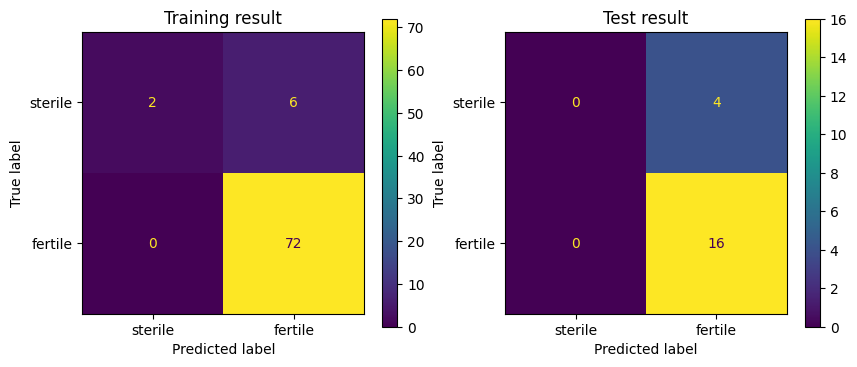

In [53]:
fig, axes = plt.subplots(1,2,figsize=(10,4)) # On initialise notre figure

# On plot la matrice de confusion de l'entrainement
cf_matrix = CM(y_train, y_train_predict )
cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["sterile","fertile"])
cm_plt.plot(ax=axes[0])
axes[0].set_title("Training result")

# On plot la matrice de confusion de l'entrainement
cf_matrix = CM(y_test, y_test_predict)
cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["sterile","fertile"])
cm_plt.plot(ax=axes[1])
axes[1].set_title("Test result")

Le modèle ne s'améliore pas en diminuant la complexité. Par la suite, on essaie d'utiliser un autre modèle d'arbre de décision, le 'ExtraTreeClassifier'. Ce dernier, au lieu de sélectionner l'ordre des caractéristiques en fonction du score de Gini, va plutôt sélectionner les caractéristiques d'une manière aléatoire.


Ce modèle dépend alors énormément du SEED. Afin de sélectionner le seed 34, une boucle a été réalisée en utilisant plusieurs seeds afin d'en dégager le meilleur.

In [54]:
from sklearn.tree import ExtraTreeClassifier
warnings.filterwarnings("ignore") # On enleve les warnings
seed_scores = [] # ce tableau contiendra la moyennes des score d'entrainement avec des seed variables
for i in range(50) :
  clf_dt3 = ExtraTreeClassifier(random_state=i) # Pour obtenir ce seed on a fait varier le random_state sur une boucle
  clf_dt3.fit(x_train,y_train) # on entraine
  y_train_predict = clf_dt3.predict(x_train) # on predit le sur les données d'entrainement
  y_test_predict = clf_dt3.predict(x_test) # on predit sur les données de test

  # on crée des chaines de caracteres contenant la moyenne de tous les score associé au seed utilisé
  seed_scores.append(str((f1_score(y_test, y_test_predict, average='weighted')+
  recall_score(y_test, y_test_predict, average='weighted') +
  precision_score(y_test, y_test_predict, average='weighted') +
  accuracy_score(y_test, y_test_predict) ) / 4) + " -> " + str(i))

seed_scores.sort()
seed_scores.reverse()
seed_scores[:5]

['0.9 -> 34',
 '0.8993464052287582 -> 33',
 '0.8462781954887219 -> 46',
 '0.8462781954887219 -> 44',
 '0.8462781954887219 -> 13']

In [55]:
warnings.filterwarnings("default")

In [56]:
clf_dt3 = ExtraTreeClassifier(random_state=34) # Pour obtenir ce seed on a fait varier le random_state sur une boucle
clf_dt3.fit(x_train,y_train) # on entraine
y_train_predict = clf_dt3.predict(x_train) # on predit le sur les données d'entrainement
y_test_predict = clf_dt3.predict(x_test) # on predit sur les données de test

Text(0.5, 1.0, 'Test result')

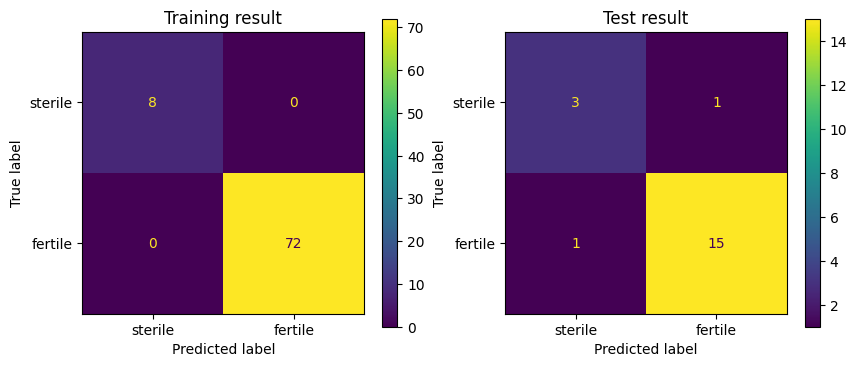

In [57]:
fig, axes = plt.subplots(1,2,figsize=(10,4)) # On initialise notre figure

# On plot la matrice de confusion de l'entrainement
cf_matrix = CM(y_train, y_train_predict )
cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["sterile","fertile"])
cm_plt.plot(ax=axes[0])
axes[0].set_title("Training result")

# On plot la matrice de confusion de l'entrainement
cf_matrix = CM(y_test, y_test_predict)
cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["sterile","fertile"])
cm_plt.plot(ax=axes[1])
axes[1].set_title("Test result")

In [58]:
print("f1 score entrainement : ",f1_score(y_train, y_train_predict, average='weighted'))
print("f1 score test : ",f1_score(y_test, y_test_predict, average='weighted'))
print("recall_score entrainement : ",recall_score(y_train, y_train_predict, average='weighted'))
print("recall_score test : ",recall_score(y_test, y_test_predict, average='weighted'))
print("precision entrainement : ",precision_score(y_train, y_train_predict, average='weighted'))
print("precision test : ",precision_score(y_test, y_test_predict, average='weighted'))
print("justesse entrainement : ",accuracy_score(y_train, y_train_predict))
print("justesse test : ",accuracy_score(y_test, y_test_predict))

f1 score entrainement :  1.0
f1 score test :  0.9
recall_score entrainement :  1.0
recall_score test :  0.9
precision entrainement :  1.0
precision test :  0.9
justesse entrainement :  1.0
justesse test :  0.9


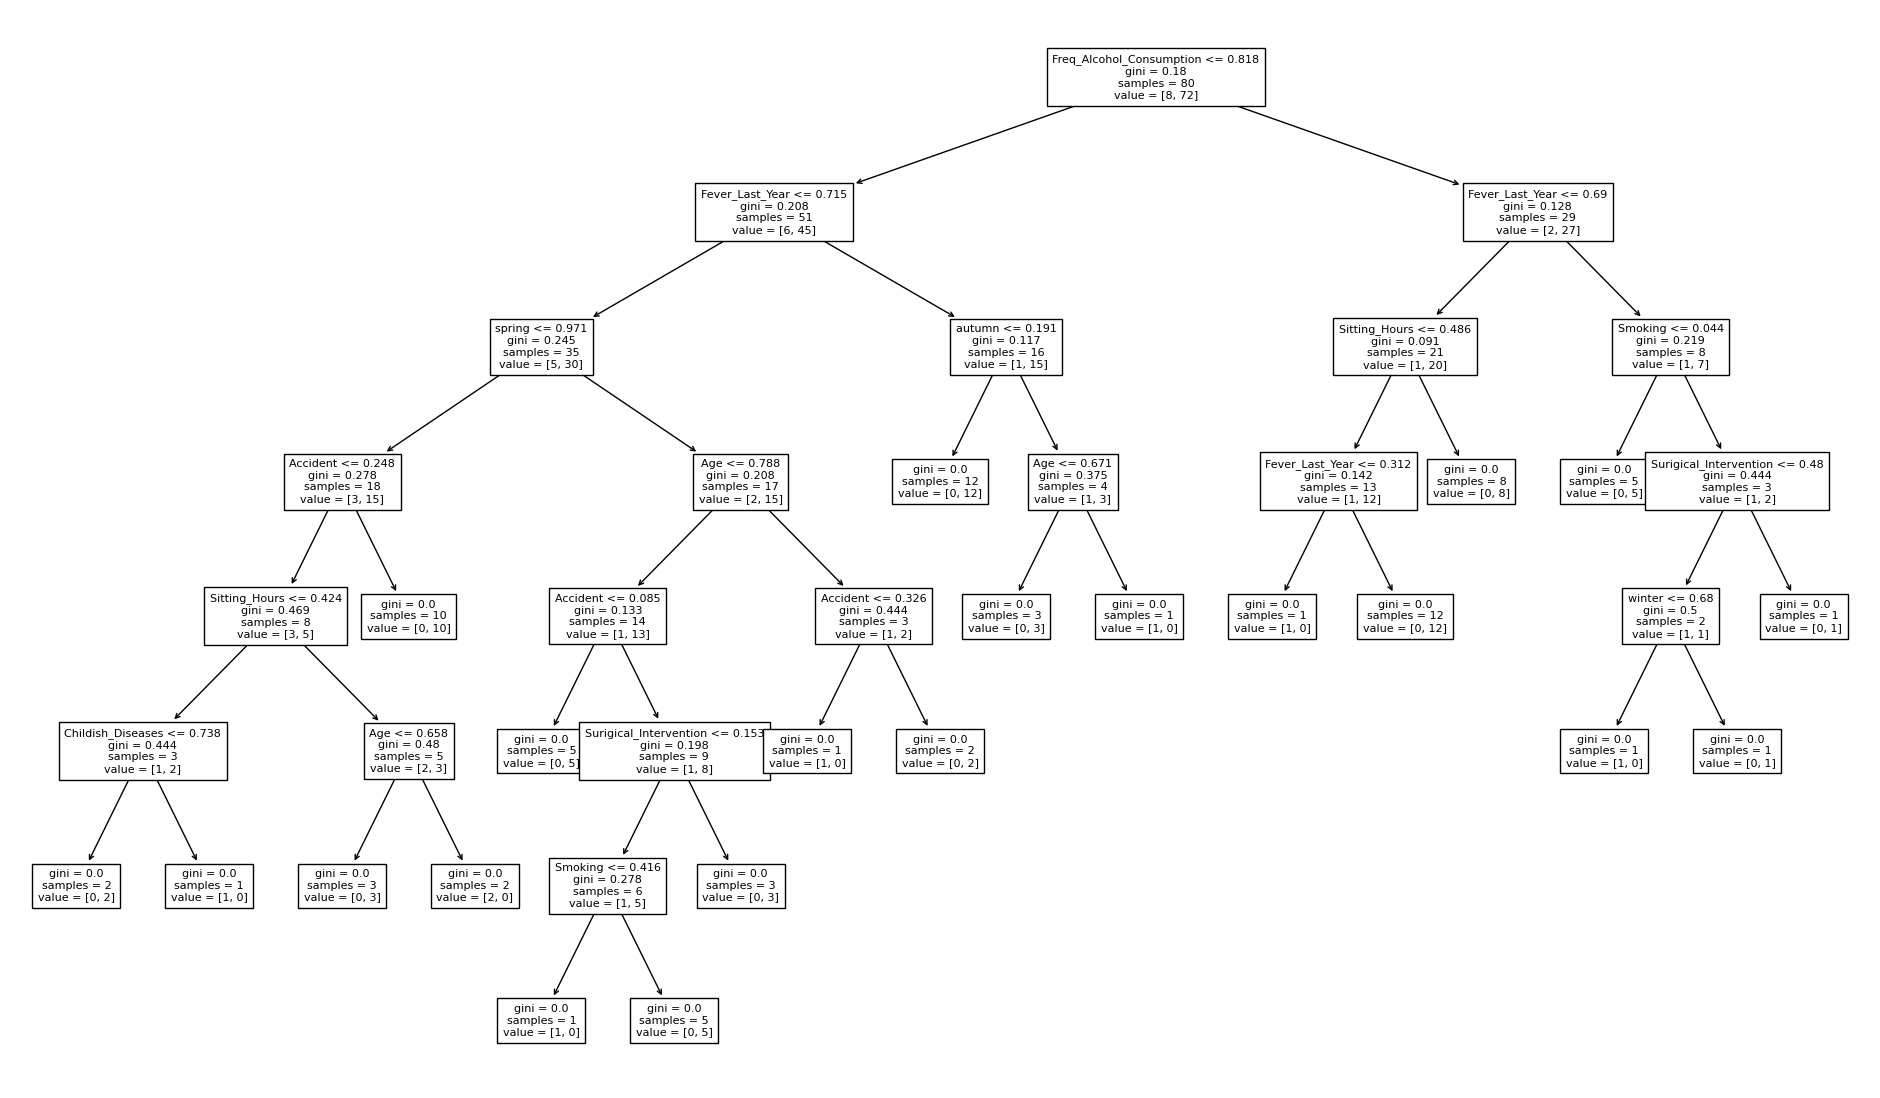

In [59]:
fig , ax = plt.subplots(figsize=(24,14))
tree.plot_tree(clf_dt3,ax=ax,fontsize=8,feature_names=x_train.columns)
plt.show()

On voit que le model a gangé encore plus en complexité.

On plot la courbe ROC

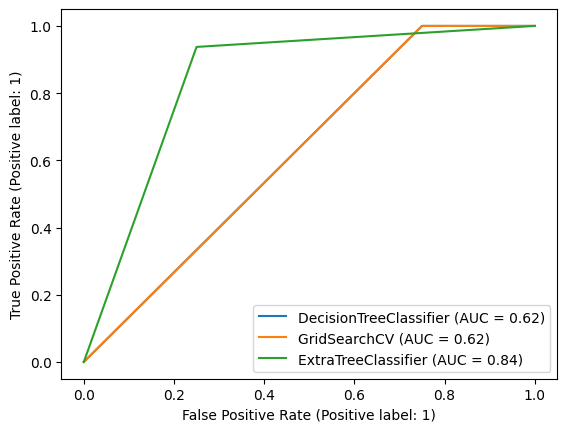

In [60]:
fig , ax = plt.subplots()
plt_roc_curve.from_estimator(clf_dt, x_test, y_test,ax=ax)
plt_roc_curve.from_estimator(clf_dt2, x_test, y_test,ax=ax)
plt_roc_curve.from_estimator(clf_dt3, x_test, y_test,ax=ax)

# Conclusion

- Il semblerait qu'il n'y ait pas de variable qui aurait une plus grande influence sur la fertilité que d'autres variables, hormis la saison de l'automne qui pourrait être un biais de sélection pour l'expérimentation étudiée.
- Le cumul des facteurs de risques n'est pas non plus synonyme de fertilité altérée.
- Le modèle ExtraTreeClassifier est celui qui s'adapte le mieux à cette classification. Cependant, le jeu de données étant pauvre en individus avec une fertilité altérée, rend la tâche difficile pour mettre au point un modèle permettant de classifier de manière fiable.